# Spam detection

## Packages

In [ ]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from string import punctuation
import numpy as np
import os
from distutils.version import LooseVersion
import warnings

## Data procesing

In [ ]:
with open('SMSSpamCollection', 'r') as f:
    data = f.read()
    

all_text = ''.join([c for c in data if c not in punctuation])
all_text = all_text.lower()

# split label and text of each line.
messages = all_text.split('\n')
messages = [x.split('\t') for x in messages if len(x)>=1]
[labels, sentences] = np.array([list(x) for x in zip(*messages)])
labels = np.array([1 if each == 'spam' else 0 for each in labels])

## Index of words and senteces as number sequences

In [ ]:
np.shape(sentences)

(5574,)

In [ ]:
training_size = 5000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
vocab_size = 10000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

In [ ]:
text_lens = [len(x) for x in training_sequences]
max(text_lens)

171

In [ ]:
max_length = 171
trunc_type='post'
padding_type='post'

training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Model

In [ ]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 171, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
157/157 - 19s - loss: 0.2928 - accuracy: 0.8986 - val_loss: 0.0662 - val_accuracy: 0.9826
Epoch 2/10
157/157 - 15s - loss: 0.0506 - accuracy: 0.9868 - val_loss: 0.0408 - val_accuracy: 0.9826
Epoch 3/10
157/157 - 15s - loss: 0.0224 - accuracy: 0.9938 - val_loss: 0.0507 - val_accuracy: 0.9861
Epoch 4/10
157/157 - 15s - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0472 - val_accuracy: 0.9861
Epoch 5/10
157/157 - 14s - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0450 - val_accuracy: 0.9861
Epoch 6/10
157/157 - 14s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0456 - val_accuracy: 0.9895
Epoch 7/10
157/157 - 15s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0457 - val_accuracy: 0.9895
Epoch 8/10
157/157 - 15s - loss: 6.0642e-04 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9913
Epoch 9/10
157/157 - 15s - loss: 4.5085e-04 - accuracy: 0.9998 - val_loss: 0.0481 - val_accuracy: 0.9895
Epoch 10/10
157/157 - 15s - loss: 2.7365e-04 - accuracy: 1.0000 - val_loss: 0.0493 

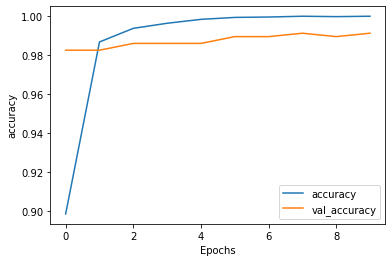

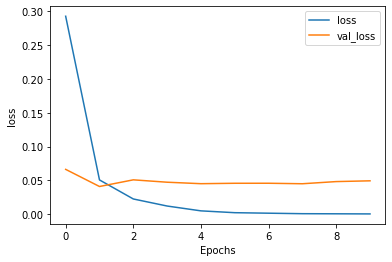

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Predictions

In [ ]:
num=4
sentence = [testing_sentences[num]]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Prediction:',model.predict(padded)[0][0])
print('Valor real:',testing_labels[num])

Prediction: 0.9999722
Valor real: 1
